<a href="https://colab.research.google.com/github/Sanghita-C/Graph-Deep-Learning-on-Modulated-Signal-Classification/blob/main/DGCNN_Graph_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ts2vg
!pip install StellarGraph

In [ ]:
import numpy as np
from math import atan

In [ ]:
import pandas as pd
df1 = pd.read_excel('BPSKModSignals.xlsx',header = None)
df2 = pd.read_excel('64QAMmagSignals.xlsx',header = None)
#df3 = pd.read_excel('GFSKMagSignals.xlsx',header = None)
df = pd.concat([df1,df2],axis=1)
print(df.head())
print(df.shape)

        0         1         2         3         4         5         6    \
0  0.519681  0.382057  0.694536  1.685461  1.287303  1.464971  1.917968   
1  0.798028  0.360243  0.647792  0.881805  1.869244  2.187002  0.643027   
2  1.385062  1.456002  0.536612  1.547960  1.072391  0.833254  0.103374   
3  0.589882  1.461255  0.905232  0.884514  1.292295  1.343293  0.984002   
4  1.155114  0.889908  1.181489  0.239214  0.240618  0.899716  0.279313   

        7         8         9    ...       990       991       992       993  \
0  1.200254  1.188969  1.481862  ...  0.327275  0.367779  0.708952  1.180455   
1  0.341909  0.920655  0.592476  ...  0.545808  1.042258  0.200139  0.922647   
2  0.409530  1.245530  0.747188  ...  0.238362  1.164617  1.094023  1.298176   
3  0.522532  0.507792  0.879256  ...  1.339748  0.991223  1.171921  0.938449   
4  1.041494  0.599085  0.787540  ...  1.033626  0.826715  0.543034  0.159285   

        994       995       996       997       998       999  
0  0

In [ ]:
df = df.to_numpy()
type(df)

numpy.ndarray

In [ ]:
#hist, bins = np.histogram(df,20)
#print(hist)
#print(bins)

In [ ]:
'''
binned_df = np.zeros((1024,1000))
for i in range(0,1000):
  for j in range(0,1000):
    binned = False
    for k in range(1,20):
      if df[i][j]<bins[k]:
        binned_df[i][j] = k
        binned = True
        break
    if binned == False:
      binned_df[i][j] = 20
print(binned_df[0][0])
print(binned_df.shape)
binned_df
'''

'\nbinned_df = np.zeros((1024,1000))\nfor i in range(0,1000):\n  for j in range(0,1000):\n    binned = False\n    for k in range(1,20):\n      if df[i][j]<bins[k]:\n        binned_df[i][j] = k\n        binned = True\n        break\n    if binned == False:\n      binned_df[i][j] = 20\nprint(binned_df[0][0])\nprint(binned_df.shape)\nbinned_df\n'

In [ ]:
#binned_df1 = np.digitize(df,bins)
#binned_df1

In [ ]:
import networkx as nx
from ts2vg import NaturalVG
import matplotlib.pyplot as plt
from stellargraph import StellarGraph
#G.add_nodes_from(bins)

In [ ]:
sample_time = 5e-6;

In [ ]:
graphSet = []
graphLabel = []

In [ ]:
for i in range(0,2000):
  #ts = binned_df1[:,i]
  ts= df[:,i]
  hist, bins = np.histogram(ts,20)
  binned_ts = np.digitize(ts,bins)
  G = nx.MultiGraph()
  g1 = NaturalVG()

  #print(binned_ts)
  g1.build(ts)
  edges = g1.edges
  #print(edges)
  for pairs in edges:
    #print(i)
    #print(pairs[0])
    #print(pairs[1])
    #print(df[pairs[1],i])
    #print(df[pairs[0],i])
    if pairs[0]>pairs[1]:
      weight_of_edge = atan((ts[pairs[0]]-ts[pairs[1]])/((pairs[0]-pairs[1])))
    else:
      weight_of_edge = atan((ts[pairs[1]]-ts[pairs[0]])/((pairs[1]-pairs[0])))
    #print(binned_df1[pairs[0],i])
    #print(binned_df1[pairs[1],i])
    #print(weight_of_edge)
    G.add_edge(binned_ts[pairs[0]],binned_ts[pairs[1]],weight = weight_of_edge)
  '''
        The next part will take care of generating few features for each node and we will try to embedd these features to the nodes
        which will be used later while doing the CNN part.

        AS OF NOW THE FEATURES DON'T INCLUDE STANDARD DEVIATION OF EDGE WEIGHTS

  '''
  node_id = list(G.nodes())
  #print(node_id)
  node_attr = {}
  for node in node_id:
    key = node
    degrees = G.degree(node)
    edgeMean = G.degree(node,weight="weight")
    edgeMean = edgeMean/degrees
    feature_set = {'Degrees': degrees,
                   'MeanWeight': edgeMean}
    node_attr[key] = feature_set


  feature_df = pd.DataFrame(node_attr)
  feature_df = feature_df.transpose()
  #print(feature_df)
  nx.set_node_attributes(G,node_attr)
  graph = StellarGraph.from_networkx(G,node_features = feature_df)
  graphSet.append(graph)
  if i<1000:
    graphLabel.append(1)
  else:
    graphLabel.append(2)


  #print(graph.info())

  #nx.draw( G )
  #plt.show()
  #print(G.number_of_nodes())
  #print(type(G.nodes()))
    #G.add_edge(pairs[0],pairs[1])

In [ ]:
print(len(graphLabel))
print(graphLabel)

2000
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
#graphLabel = graphLabel[800:2000]
#graphSet = graphSet[800:2000]

In [ ]:
merge_set = pd.DataFrame({'Graphs':graphSet,'modulation':graphLabel})
merge_set = merge_set.sample(frac=1)
print(merge_set)

                                                 Graphs  modulation
204   <stellargraph.core.graph.StellarGraph object a...           1
1101  <stellargraph.core.graph.StellarGraph object a...           2
19    <stellargraph.core.graph.StellarGraph object a...           1
973   <stellargraph.core.graph.StellarGraph object a...           1
1007  <stellargraph.core.graph.StellarGraph object a...           2
...                                                 ...         ...
504   <stellargraph.core.graph.StellarGraph object a...           1
148   <stellargraph.core.graph.StellarGraph object a...           1
1403  <stellargraph.core.graph.StellarGraph object a...           2
1440  <stellargraph.core.graph.StellarGraph object a...           2
1317  <stellargraph.core.graph.StellarGraph object a...           2

[2000 rows x 2 columns]


In [ ]:
graphSet = list(merge_set['Graphs'])
graphLabel = list(merge_set['modulation'])

In [ ]:
graphLabel = pd.Series(graphLabel)

In [ ]:
graphLabel = pd.get_dummies(graphLabel, drop_first=True)
print(graphLabel)

      2
0     0
1     1
2     0
3     0
4     1
...  ..
1995  0
1996  0
1997  1
1998  1
1999  1

[2000 rows x 1 columns]


In [ ]:
print(len(graphSet))
print(graphSet[0].info())
print(graphSet[1].info())

2000
StellarGraph: Undirected multigraph
 Nodes: 20, Edges: 3172

 Node types:
  default: [20]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [3172]
        Weights: range=[-1.08263, 1.09809], mean=-0.000620057, std=0.307655
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 20, Edges: 3212

 Node types:
  default: [20]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [3212]
        Weights: range=[-1.09419, 1.17979], mean=0.00107934, std=0.299191
        Features: none


In [ ]:
#graphSet = list(merge_set['Graphs'])
#graphLabel = list(merge_set['modulation'])
#graphLabel = pd.DataFrame(graphLabel,columns =['Labels'])
graphLabel.value_counts().to_frame()

,0
2,
0,1000
1,1000


In [ ]:
'''#some form of encoding
graphLabel = pd.get_dummies(graphLabel, drop_first=True)
print(graphLabel)
print(pd.get_dummies(graphLabel))
pd.get_dummies(graphLabel, drop_first=True)
s1 = [1,2,3,1,1,2]
print(pd.get_dummies(s1))
print(pd.get_dummies(s1,drop_first=True))
s1 = [-1,1,1,1,1,-1,1,-1,-1]
print(pd.get_dummies(s1))
print(pd.get_dummies(s1,drop_first=True))
s1 = pd.get_dummies(s1,drop_first=True)
print(s1)
'''

'#some form of encoding\ngraphLabel = pd.get_dummies(graphLabel, drop_first=True)\nprint(graphLabel)\nprint(pd.get_dummies(graphLabel))\npd.get_dummies(graphLabel, drop_first=True)\ns1 = [1,2,3,1,1,2]\nprint(pd.get_dummies(s1))\nprint(pd.get_dummies(s1,drop_first=True))\ns1 = [-1,1,1,1,1,-1,1,-1,-1]\nprint(pd.get_dummies(s1))\nprint(pd.get_dummies(s1,drop_first=True))\ns1 = pd.get_dummies(s1,drop_first=True)\nprint(s1)\n'

In [ ]:

from stellargraph.mapper import PaddedGraphGenerator
generator = PaddedGraphGenerator(graphs=graphSet)
print(generator)

In [ ]:
!pip install tensorflow

In [ ]:
from stellargraph.layer import GCNSupervisedGraphClassification
from stellargraph.layer import DeepGraphCNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
import tensorflow as tf
from sklearn import model_selection

In [ ]:
k = 35  # the number of rows for the output tensor
layer_sizes = [32, 32, 32, 1]

dgcnn_model = DeepGraphCNN(
    layer_sizes=layer_sizes,
    activations=["tanh", "tanh", "tanh", "tanh"],
    k=k,
    bias=False,
    generator=generator,
)
x_inp, x_out = dgcnn_model.in_out_tensors()

Instructions for updating:
Use fn_output_signature instead


In [ ]:
x_out = Conv1D(filters=16, kernel_size=sum(layer_sizes), strides=sum(layer_sizes))(x_out)
x_out = MaxPool1D(pool_size=2)(x_out)

x_out = Conv1D(filters=32, kernel_size=5, strides=1)(x_out)

x_out = Flatten()(x_out)

x_out = Dense(units=128, activation="relu")(x_out)
x_out = Dropout(rate=0.5)(x_out)

predictions = Dense(units=1, activation="sigmoid")(x_out)

In [ ]:
model = Model(inputs=x_inp, outputs=predictions)

model.compile(
    optimizer=Adam(lr=0.0001), loss=binary_crossentropy, metrics=["acc"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_graphs, test_graphs = model_selection.train_test_split(
    graphLabel, train_size=0.9, test_size=None, stratify=graphLabel,
)

In [ ]:
gen = PaddedGraphGenerator(graphs=graphSet)

train_gen = gen.flow(
    list(train_graphs.index - 1),
    targets=train_graphs.values,
    batch_size=50,
    symmetric_normalization=False,
)

test_gen = gen.flow(
    list(test_graphs.index - 1),
    targets=test_graphs.values,
    batch_size=1,
    symmetric_normalization=False,
)

In [ ]:
epochs = 100

In [ ]:
history = model.fit(
    train_gen, epochs=epochs, verbose=1, validation_data=test_gen, shuffle=True,
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Reshape:0", shape=(None, None), dtype=float32), dense_shape=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


36/36 [==============================] - 27s 363ms/step - loss: 0.6978 - acc: 0.4906 - val_loss: 0.6927 - val_acc: 0.5050
Epoch 2/100
36/36 [==============================] - 5s 143ms/step - loss: 0.6942 - acc: 0.4994 - val_loss: 0.6926 - val_acc: 0.5250
Epoch 3/100
36/36 [==============================] - 5s 142ms/step - loss: 0.6943 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/100
36/36 [==============================] - 5s 142ms/step - loss: 0.6961 - acc: 0.4917 - val_loss: 0.6931 - val_acc: 0.4950
Epoch 5/100
36/36 [==============================] - 5s 141ms/step - loss: 0.6930 - acc: 0.5089 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/100
36/36 [==============================] - 5s 141ms/step - loss: 0.6948 - acc: 0.4839 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/100
36/36 [==============================] - 5s 140ms/step - loss: 0.6930 - acc: 0.5056 - val_loss: 0.6931 - val_acc: 0.5250
Epoch 8/100
36/36 [==============================] - 5s 142ms/step - loss: 0.694

In [ ]:
import stellargraph as sg

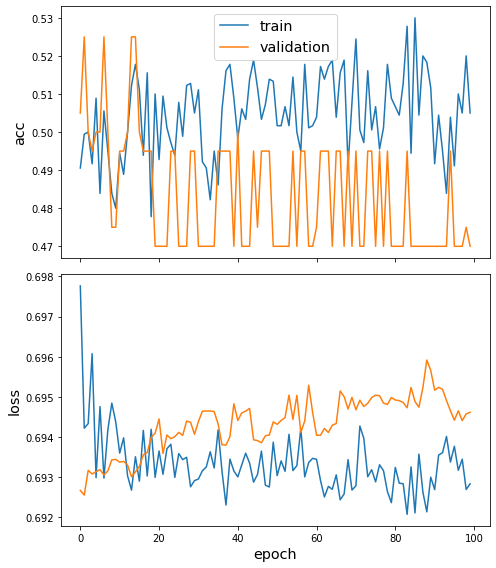

In [ ]:
sg.utils.plot_history(history)

In [ ]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

200/200 [==============================] - 1s 6ms/step - loss: 0.6946 - acc: 0.4700

Test Set Metrics:
	loss: 0.6946
	acc: 0.4700
